In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [115]:
MANIPULATIONS = ["point33", "point5", "point66", "minus1"]
COLORS = ["BLUE", "RED", "GREEN", "ORANGE"]
BASELINE = "test_filtered"
METRIC = "Recall@1"

In [116]:
def get_performance_df(metric, condition):
    path = f"evaluation_results/{condition}/mdetr_detailed.csv"
    df = pd.read_csv(path)
    df = df[df["metric"].str.startswith(f"{metric}_")]
    df["metric"] = df["metric"].str.replace(f"{metric}_","")
    df = df.rename(columns={"metric":"Image_Id"," avg":metric})
    df = df.set_index("Image_Id").sort_index()
    df = df.drop("all",axis=0)
    return df

def get_sentence_metric_df(condition):
    condition = f"test_scrambled_{condition}" if condition in MANIPULATIONS else condition
    condition = condition.replace("minus", "-")
    path = f"flickr_test_datasets_sentence_metrics/final_flickr_separateGT_{condition}_summary.csv"
    df = pd.read_csv(path)
    df = df.set_index("Image_Id").sort_index()
    return df

def get_sentence_distance_df(condition):
    assert condition != BASELINE
    df = pd.read_csv("flickr_test_datasets_sentence_metrics/normalized_damerau_levenshtein_distances.csv")
    df = df.rename(columns={f"DL_Dist_{condition.replace('minus','-')}":"Damerau Levenshtein Distance"})
    df = df[["Image_Id","Damerau Levenshtein Distance"]].set_index("Image_Id")
    return df

### Difference in Performance on Sentence Level

In [117]:
df_performance_baseline = get_performance_df(METRIC, BASELINE)
df_performance_baseline = df_performance_baseline.rename(columns={METRIC:"Baseline"})
dfs = []

for i,m in enumerate(MANIPULATIONS):
    df_performance_m = get_performance_df(METRIC, m)
    df_complete = df_performance_baseline.join(df_performance_m)
    df_complete[f"Diff {METRIC}"] = df_complete[METRIC]-df_complete["Baseline"]
    df_complete = df_complete.rename(columns={METRIC:"Manipulation"})
    df_complete["Manipulation"] = m
    dfs.append(df_complete)
df = pd.concat(dfs)

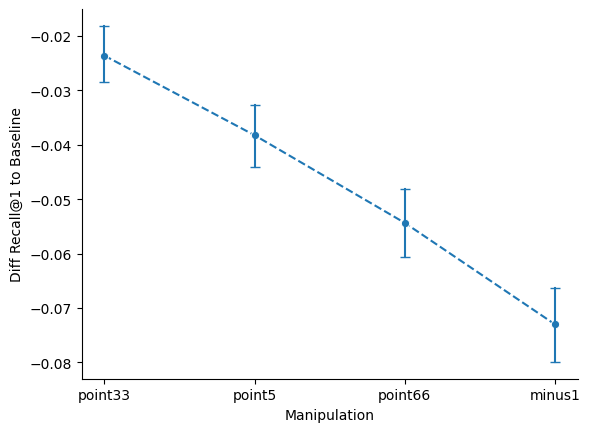

In [118]:
#plt.plot(MANIPULATIONS, [0 for _ in MANIPULATIONS], color="black", linestyle="dashed")
sns.lineplot(data=df, x="Manipulation", y=f"Diff {METRIC}",marker="o",err_style="bars",linestyle='dashed',err_kws={'capsize':3.5})
plt.ylabel(f"Diff {METRIC} to Baseline")
sns.despine()

### Max Branching Width and Max Branching Height (Baseline)

In [119]:
df_performance = get_performance_df(METRIC, BASELINE)
df_sentence = get_sentence_metric_df(BASELINE)
df_complete = df_performance.join(df_sentence)

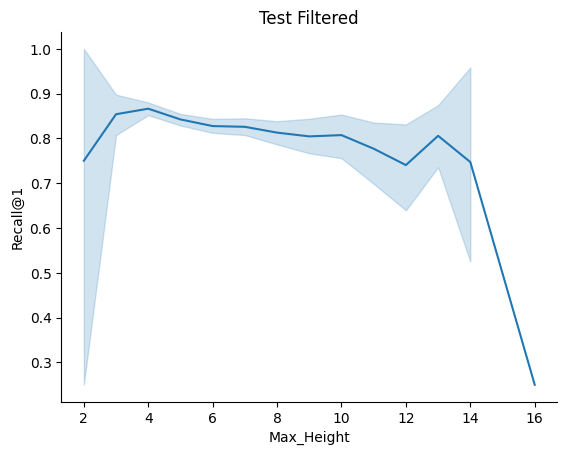

In [120]:
sns.lineplot(data=df_complete, x="Max_Height",y=METRIC)
plt.title("Test Filtered")
sns.despine()

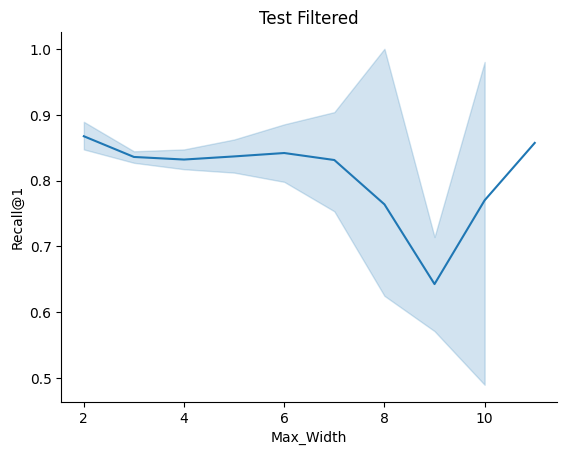

In [121]:
sns.lineplot(data=df_complete, x="Max_Width",y=METRIC)
plt.title("Test Filtered")
sns.despine()

### Max Branching Width (with Respect to unmodified Sentences)

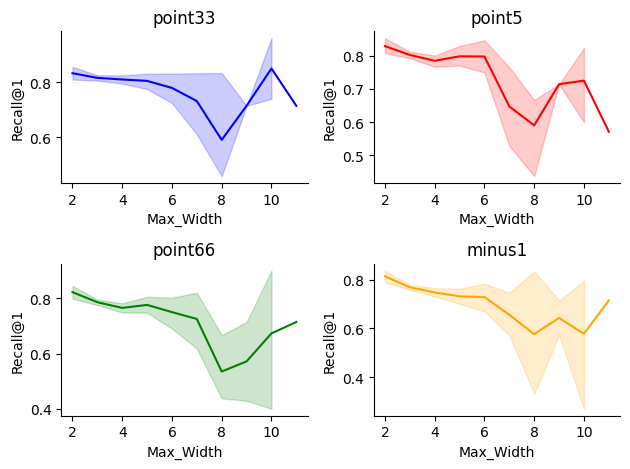

In [122]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Width"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(BASELINE)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y=METRIC,ax=ax[i],color=COLORS[i])
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

### Max Branching Height (with Respect to modified Sentences)

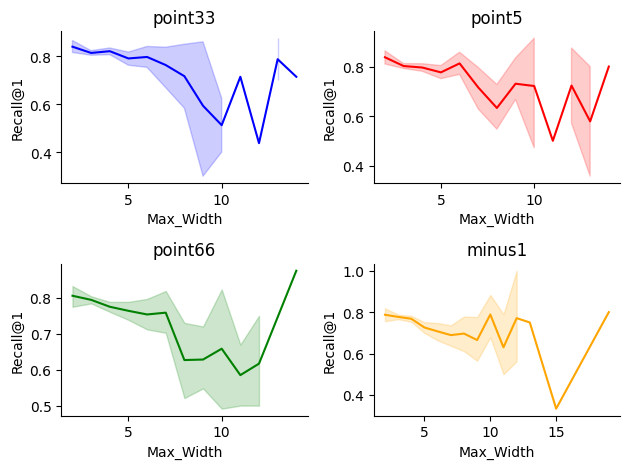

In [123]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Width"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(m)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y=METRIC,ax=ax[i],color=COLORS[i])
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

### Max Branching Height (with Respect to unmodified Sentences)

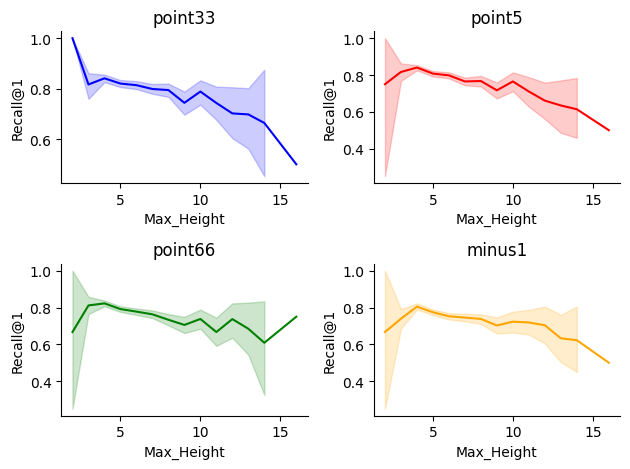

In [124]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Height"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(BASELINE)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y=METRIC,ax=ax[i],color=COLORS[i])
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

### Max Branching Height (with Respect to modified Sentences)

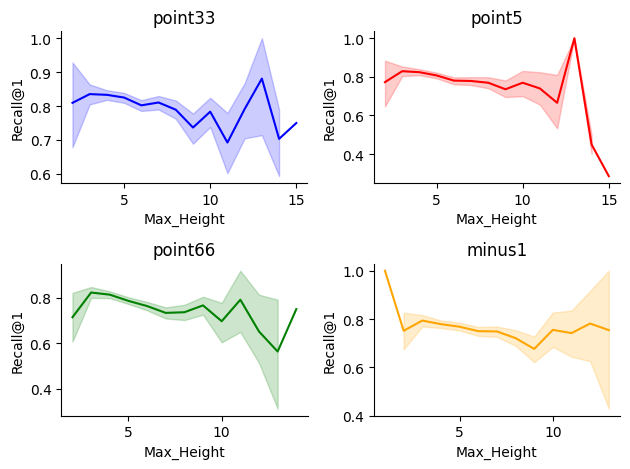

In [125]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
sentence_metric = "Max_Height"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_sentence = get_sentence_metric_df(m)
    df_complete = df_performance.join(df_sentence)
    sns.lineplot(data=df_complete, x=sentence_metric,y=METRIC,ax=ax[i],color=COLORS[i])
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()

### Damerau-Levenshtein Distance

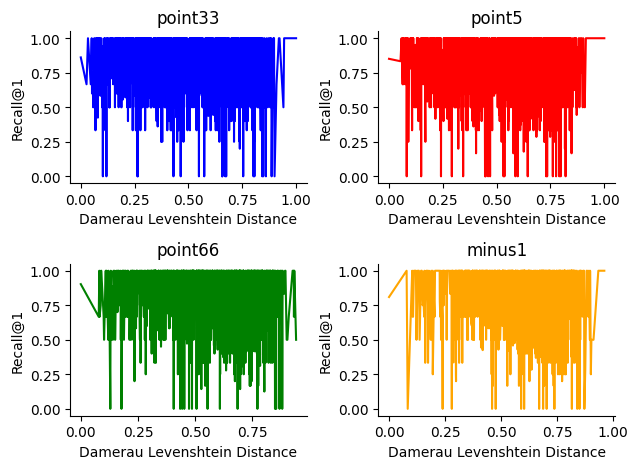

In [126]:
import numpy as np

fig, ax = plt.subplots(2,2)
ax = ax.flatten()
distance = "Damerau Levenshtein Distance"
for i,m in enumerate(MANIPULATIONS):
    df_performance = get_performance_df(METRIC, m)
    df_distance = get_sentence_distance_df(m)
    #df_distance[distance] = np.round(df_distance[distance],3)
    df_complete = df_performance.join(df_distance)
    sns.lineplot(data=df_complete, x=distance,y=METRIC,ax=ax[i],color=COLORS[i], errorbar=None)
    ax[i].set_title(m)
sns.despine()
plt.tight_layout()